In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns 

In [51]:
data = pd.read_csv("winequality-red.csv")

In [52]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [55]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [56]:
data.shape

(1599, 12)

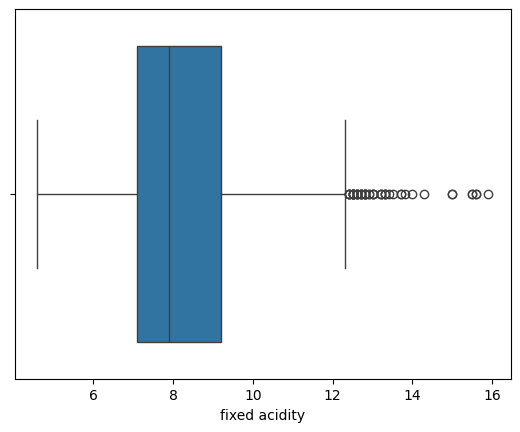

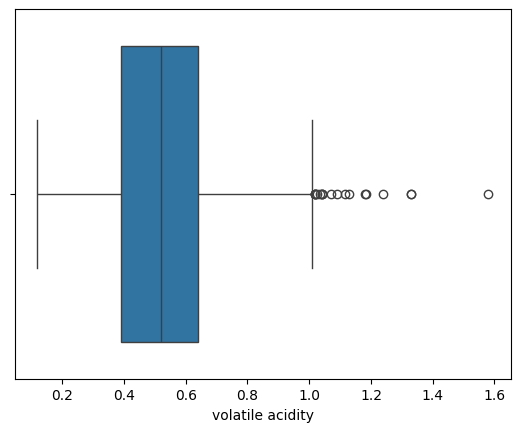

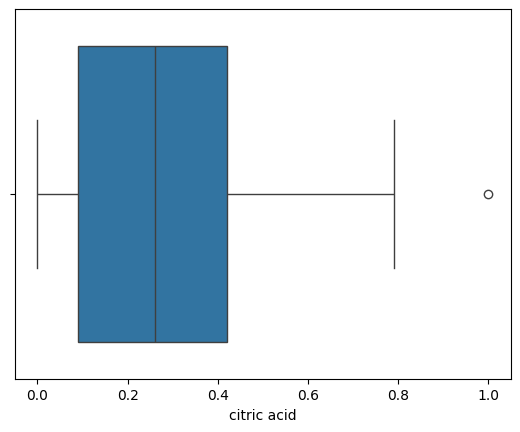

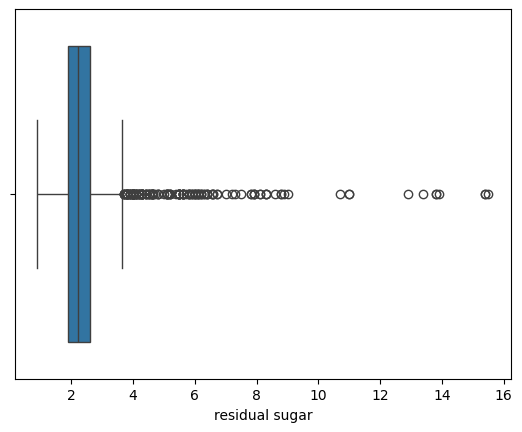

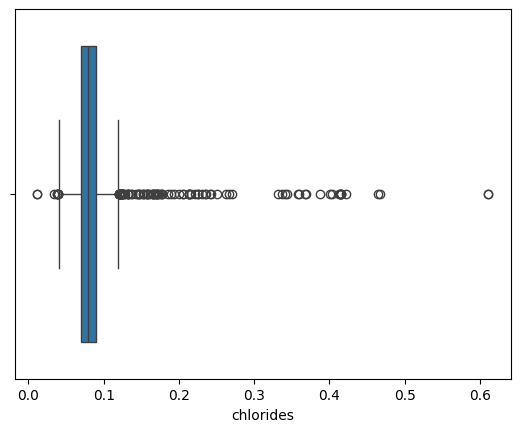

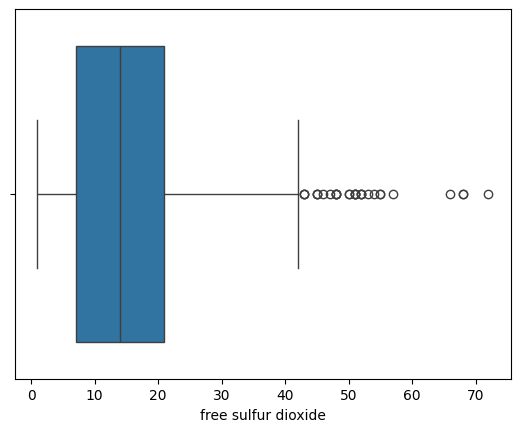

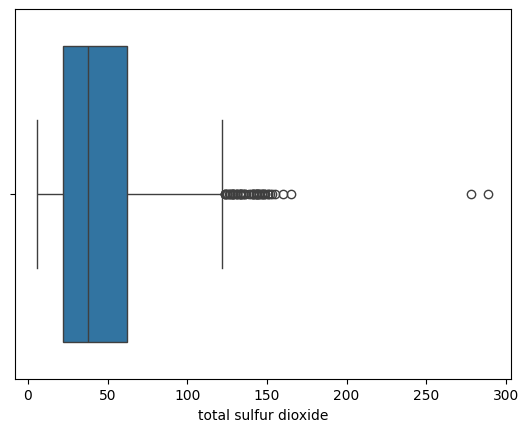

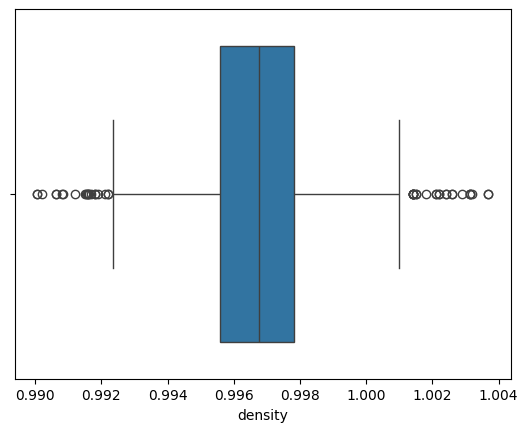

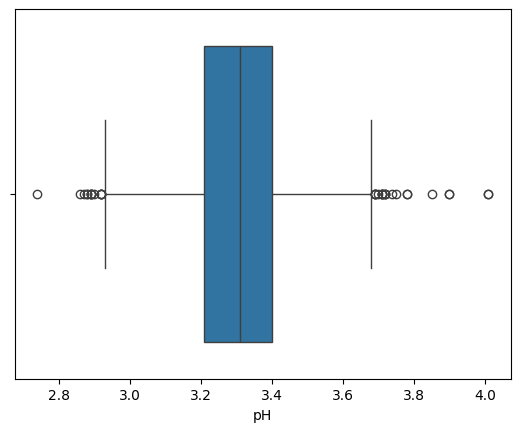

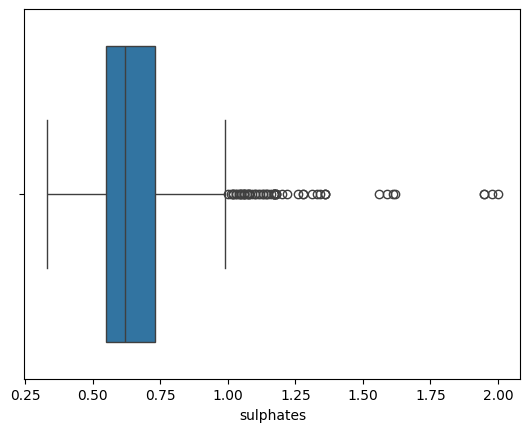

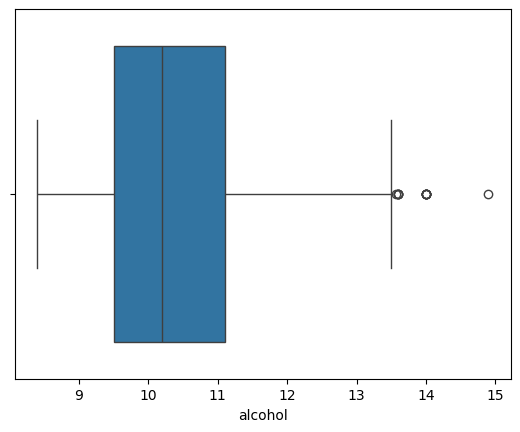

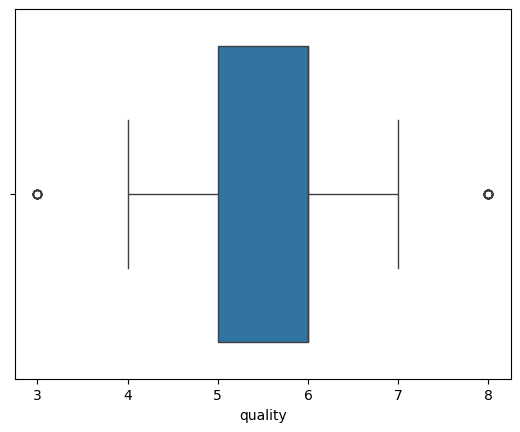

In [57]:
for i in data.columns:
    sns.boxplot(data,x=i)
    plt.show()

In [58]:
data.shape

(1599, 12)

In [59]:
def renove_out(data,col):
    Q1 = np.percentile(data[col],25)
    Q3 = np.percentile(data[col],75)
    IQR = Q3 - Q1
    lower = Q1-1.5 * IQR
    upper = Q3+1.5 * IQR
    data = data[(data[col] > lower) & (data[col] < upper)]
    data.shape
    return data

In [60]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [61]:
data = renove_out(data,"fixed acidity")

In [62]:
data = renove_out(data,"volatile acidity")


In [63]:
data = renove_out(data,"citric acid")


In [64]:
data = renove_out(data,"residual sugar")


In [65]:
data = renove_out(data,"chlorides")

In [66]:
data = renove_out(data,"free sulfur dioxide")

In [67]:
data = renove_out(data,"total sulfur dioxide")

In [68]:
data = renove_out(data,"density")

In [69]:
data = renove_out(data,"pH")

In [70]:
data = renove_out(data,"sulphates")

In [71]:
data = renove_out(data,"alcohol")

In [72]:
data.shape

(1135, 12)

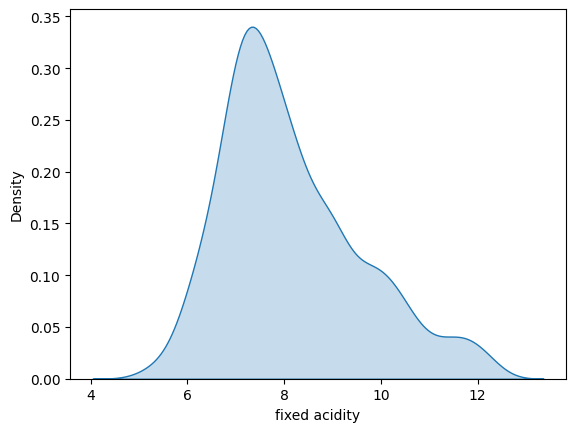

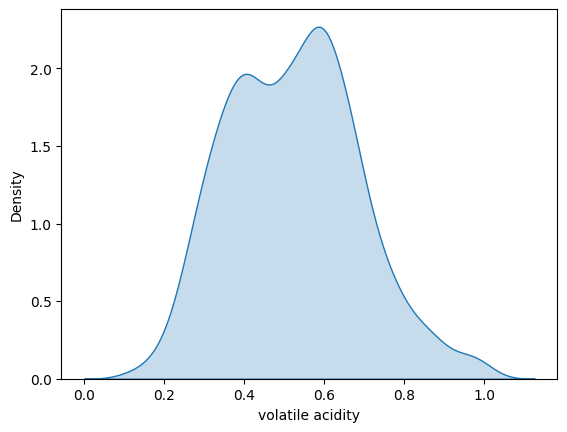

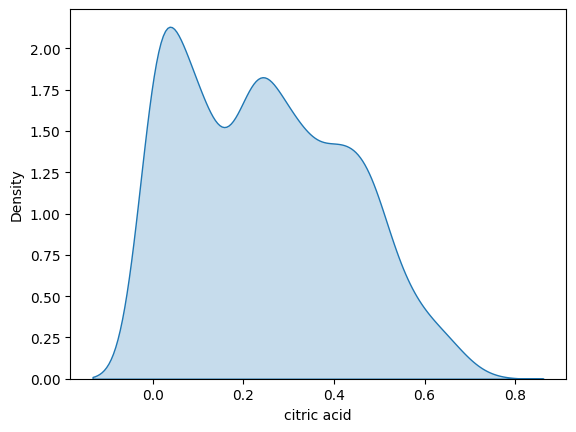

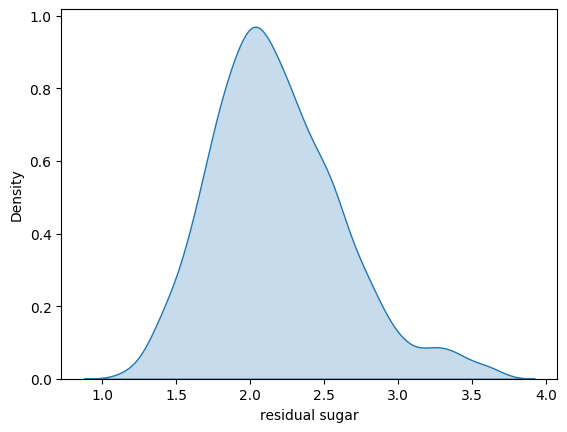

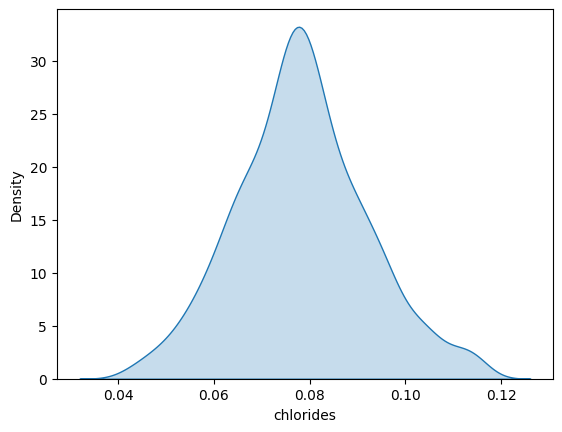

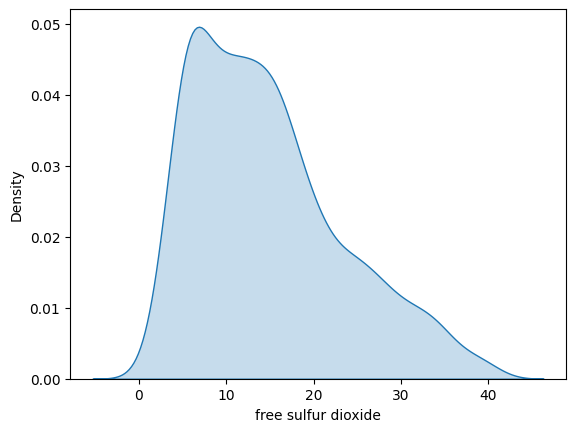

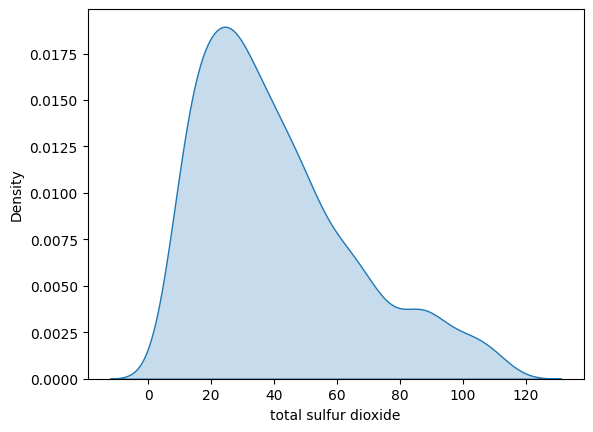

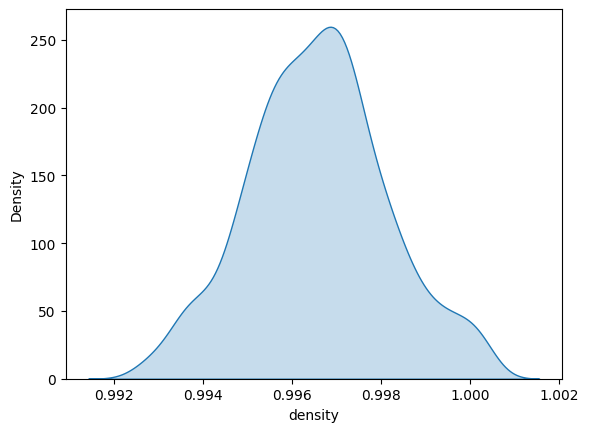

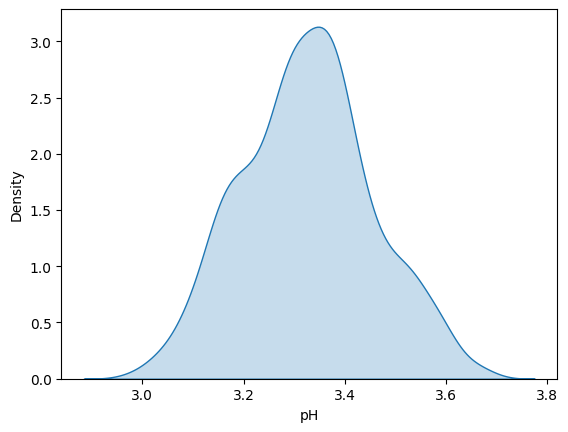

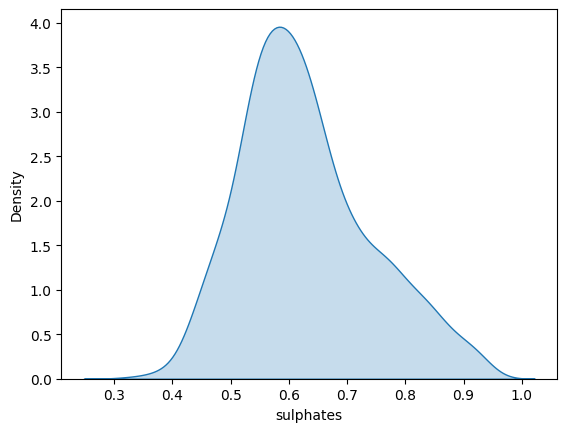

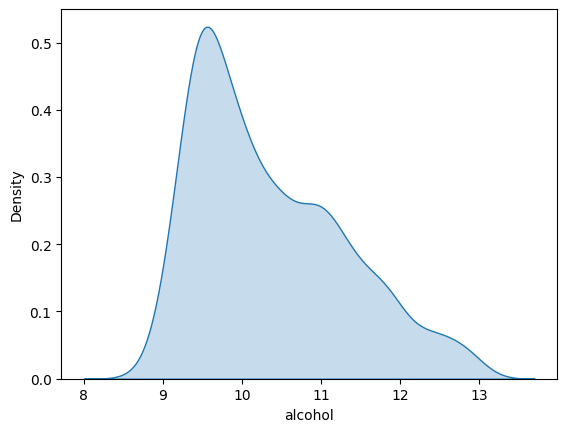

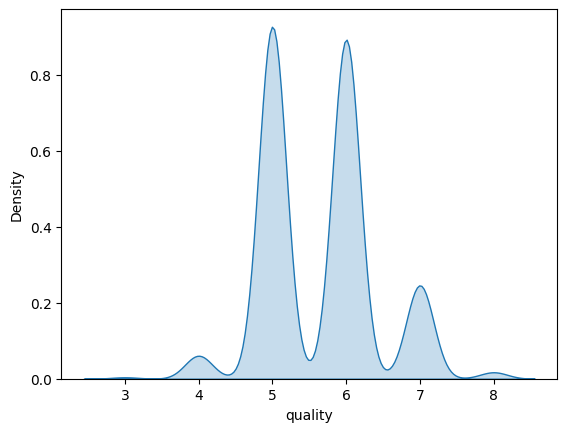

In [73]:
for i in data.columns:
    sns.kdeplot(data,x=i,fill=True)
    plt.show()

In [74]:
for i in data.columns:
    a = data.skew()
    print(f"{i} skew  : {a}")

fixed acidity skew  : fixed acidity           0.773747
volatile acidity        0.273485
citric acid             0.325800
residual sugar          0.638580
chlorides               0.174656
free sulfur dioxide     0.794622
total sulfur dioxide    0.918278
density                 0.090905
pH                      0.093694
sulphates               0.552660
alcohol                 0.731766
quality                 0.337623
dtype: float64
volatile acidity skew  : fixed acidity           0.773747
volatile acidity        0.273485
citric acid             0.325800
residual sugar          0.638580
chlorides               0.174656
free sulfur dioxide     0.794622
total sulfur dioxide    0.918278
density                 0.090905
pH                      0.093694
sulphates               0.552660
alcohol                 0.731766
quality                 0.337623
dtype: float64
citric acid skew  : fixed acidity           0.773747
volatile acidity        0.273485
citric acid             0.325800
residual sug

In [75]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [76]:
p_value_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [77]:
from scipy.stats import pearsonr

good_re = []
bad_re = []

for i in p_value_columns:
    _, p_value = pearsonr(data[i], data["quality"])
    value = 0.05
    if p_value < value:
        good_re.append(i)
    else:
        bad_re.append(i)


In [78]:
good_re

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [79]:
bad_re

['residual sugar', 'free sulfur dioxide']

In [80]:
data.drop(columns=['residual sugar', 'free sulfur dioxide'],axis=1,inplace=True)

In [81]:
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
data.shape

(1135, 10)

In [83]:
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [84]:
data["quality"].value_counts()

quality
0    996
1    139
Name: count, dtype: int64

In [85]:
data["quality"].unique()

array([0, 1])

<Axes: xlabel='quality', ylabel='count'>

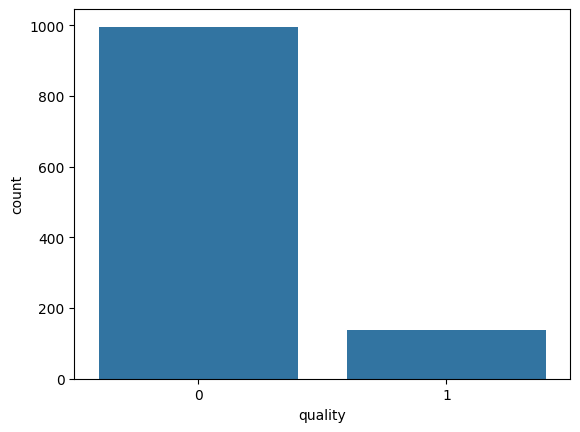

In [86]:
sns.countplot(data = data, x = 'quality')

In [87]:
X = data.drop(["quality"],axis=1)
y = data["quality"]

In [88]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [89]:
num_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
power_columns = ['fixed acidity','alcohol','sulphates']
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
perprocess = ColumnTransformer([
    ("num_pipeline",StandardScaler(),num_columns),
    ("power",PowerTransformer(method="yeo-johnson"),power_columns)
])

In [90]:
#X = perprocess.fit_transform(X)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
from imblearn.combine import SMOTETomek, SMOTEENN
smt = SMOTEENN(random_state=42,sampling_strategy='auto' )
X_train_re,y_train_re = smt.fit_resample(X_train, y_train)

In [93]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [94]:
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,0


In [95]:
X_train = perprocess.fit_transform(X_train)
X_test = perprocess.transform(X_test)

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score

In [97]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train)) 
prd = rfc.predict(X_test)
accuracy_score(y_test,prd)


1.0


0.9427312775330396